Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Возрастной рейтинг:

'E' - для всех,'M' - для взрослых, 'T' -  подросткам, 'E10+' - для всех от 10 лет и старше, 'K-A' - дети и взрослые(потом стал 'E'), 'AO' - только для взрослых, 'EC' - для детей младшего возраста, 'RP' - рейтинг ожидается


# ПРОЕКТ:ИНТЕРНЕТ-МАГАЗИН «СТРИМЧИК»

In [58]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from scipy import stats as st
import seaborn as sns

In [59]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('/content/games (1).csv')

In [60]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


## Предобработка данных

Получаем общую информацию о данных

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Проверяем на явные дубликаты

In [62]:
df.duplicated().sum()


0

Проверяем на неявные дубликаты


In [63]:
display(df['Platform'].unique())
display(df['Year_of_Release'].unique())
display(df['Name'].unique())





array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [64]:

temp = df.copy()
temp[temp[['Name', 'Platform','Year_of_Release']].duplicated(keep=False)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [65]:
df.columns = [c.lower() for c in df.columns]

Приводим к нижнему регистру названия столбцов

In [66]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Заменяем значение tbd на nan, так как на данный момент мы не знаем чем будет определено tbd

In [67]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

Изменяем тип данных с object на float для удобной работы с данными.

In [68]:
df['user_score'] = df['user_score'].astype('float')

Смотрим пропуски

In [69]:
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.545917
rating             0.404786
dtype: float64

In [70]:
df = df.dropna (subset=['name'])
df['name'].isna().mean()

0.0

В столбце 'name' удалили две строки, так как они не несут для нас полезной информации, и их удаление не скажется на датасете. Вместе с ними удалились две строки из столбца 'genre' так как они были связаны.

В столбце 'year_of_release' оставили значение NaN, так как год выхода мы не знаем.

In [71]:
#df.groupby('year_of_release').agg(total_critic=('critic_score','count'), total_user=('user_score','count'), total_games=('name', 'count'))

Мы можем обратить внимание, что в самом начале формирования игровой индустрии количество оценок низкое(мало кто серьезно относился к ней,чтобы появились игровые критики, да и площадок для обсуждения и оценок не было). Пропуски в столбцах critic_score и user_score оставляем, так как мы не можем определить оценку критиков и людей.

В столбце 'rating' пропущенные значения нам неизвестны, поэтому мы их заменили на 'неизвестно'.

In [72]:
df['rating'] = df['rating'].fillna('неизвестно')
df['rating'].isna().mean()

0.0

Считаем суммарные продажи во всех регионах и записываем их в отдельный столбец

In [73]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] +  df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,неизвестно,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,неизвестно,31.38


### Промежуточный вывод о данных


Был проведен поиск дубликатов - в данных их не было обнаружено. Так же были изменены названия столбцов, а именно - привели их к нижнему регистру. Изменили тип данных в столбце 'user_score' с object на float для удобной работы с данными. В столбце 'name' удалили две строки, так как они не несут для нас полезной информации, и их удаление не скажется на датасете. Вместе с ними удалились две строки из столбца 'genre' так как они были связаны. В столбце 'year_of_release' оставили значение NaN, так как год выхода мы не знаем. Так же мы можем заметить, что в 1980 году индустрия игр была в самом начале формирования, поэтому количество оценок низкое(мало кто имел доступ к цифровым играм). Пропуски в столбцах critic_score и user_score оставляем, так как мы не можем оценить мнение критиков или людей оно уникально. В столбце 'rating' пропущенные значения нам неизвестны, поэтому мы их заменили на 'неизвестно'. Так же был добавлен столбец под названием 'total_sales' с общим количеством продаж.

Причины пропусков:

'name' - ошибка в заполнении данных.

'year_of_release' - скорее всего год выхода нам неизвестен.

'genre' - ошибка в заполнении данных.

'critic_score ' - это связано с отсутствием площадок для оценок игр и неразвитой индустрией игр.

'user_score' - это связано с отсутствием площадок для оценок игр и неразвитой индустрией игр.

'rating' - в каждом регионе есть свой рейтинг, но здесь он неуказан, поэтому есть пропуски.


In [74]:

temp = df.copy()
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa en colores!

## Исследовательский анализ данных

Группируем данные по годам и смотрим количесвто оценок в год и количество выпущенных игр
в год


In [75]:
y = df.groupby('year_of_release').agg(total_critic=('critic_score','count'), total_user=('user_score','count'), total_games=('name', 'count'))
y

,total_critic,total_user,total_games
year_of_release,,,
1980.0,0,0,9
1981.0,0,0,46
1982.0,0,0,36
1983.0,0,0,17
1984.0,0,0,14
1985.0,1,1,14
1986.0,0,0,21
1987.0,0,0,16
1988.0,1,1,15


выбрал актуальные данные.
Создаем переменную с агрегированными данными от 2013 года. В этот год вышла консоль XboxOne и PS4

In [76]:
t = df.query('year_of_release >= 2013.0')
t.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,неизвестно,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,неизвестно,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Смотрим топ 10 платформ по продажам за все исследуемое время

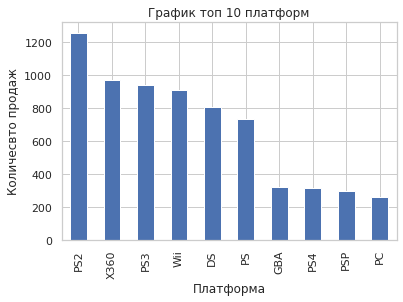

In [77]:
top_10 = df.groupby('platform').agg(total_revenue=('total_sales', 'sum')).reset_index().sort_values(by=['total_revenue'], ascending=False).head(10)
top_10.plot(kind='bar', xlabel='Платформа', x='platform', ylabel='Количесвто продаж', legend=False, title='График топ 10 платформ');


#### Строим графики для каждой платформы из топ 10 и смотрим на распределение продаж по годам

Строим график для PS2

In [78]:
ps_2 = df.query('platform == "PS2"').groupby('year_of_release')['total_sales'].agg('sum')

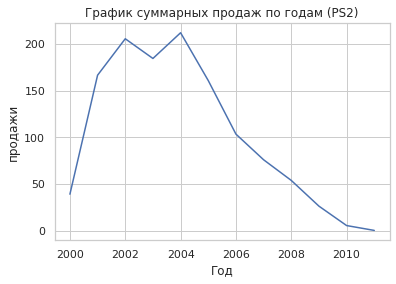

In [79]:
ps_2.plot(title='График суммарных продаж по годам (PS2)', grid=True, xlabel='Год', ylabel='продажи')
plt.show()

Заметен сильный рост продаж в момент выхода приставки в 2000, который длится до 2004 года, потом идет постоянный спад.

Строим график для X360

In [80]:
X_360 = df.query('platform == "X360"').groupby('year_of_release')['total_sales'].agg('sum')

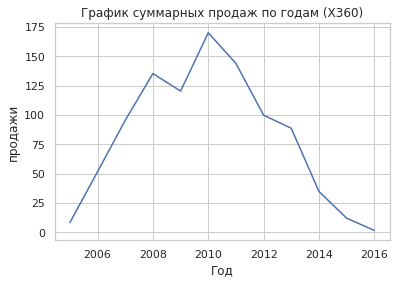

In [81]:
X_360.plot(title='График суммарных продаж по годам (X360)', grid=True, xlabel='Год', ylabel='продажи')
plt.show()

Выход в 2005. Не такой стремитльеный рост как у PS2, но уверенный, длится до 2010 года, потом постоянный спад.

Строим график для PS3

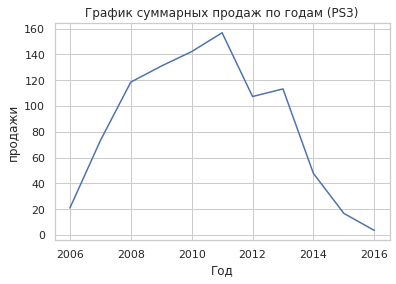

In [82]:
PS_3 = df.query('platform == "PS3"').groupby('year_of_release')['total_sales'].agg('sum')
PS_3.plot(title='График суммарных продаж по годам (PS3)', grid=True, xlabel='Год',  ylabel='продажи')
plt.show()

Мы видим  рост продаж в 2006 году, который длиться до 2011, потом идет спад до 2012, снова кратковременный рост и потом постоянный спад


Строим график для Wii

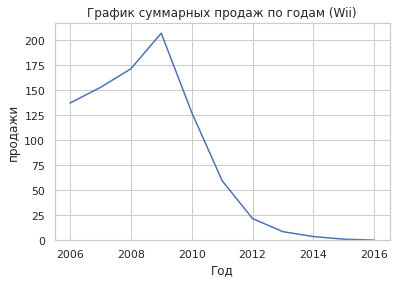

In [83]:
Wii = df.query('platform == "Wii"').groupby('year_of_release')['total_sales'].agg('sum')
Wii.plot(title='График суммарных продаж по годам (Wii)', grid=True, xlabel='Год',ylim=0,  ylabel='продажи')
plt.show()

Рост продаж в  2006 году, при этом первый год очень доходный около 126 млн копий продано, идет хороший рост до 2009 и потом постоянный сильный спад

Строим график для DS

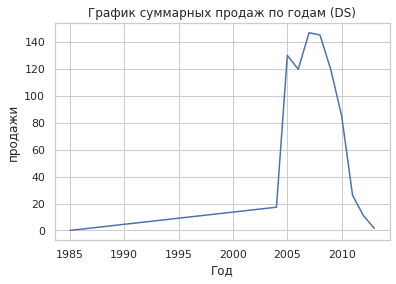

In [84]:
DS = df.query('platform == "DS"').groupby('year_of_release')['total_sales'].agg('sum')
DS.plot(title='График суммарных продаж по годам (DS)', grid=True, xlabel='Год',  ylabel='продажи')
plt.show()

Год выпуска 2004, потом резкий рост до 142млн копий и резкий  постоянный спад. В данных есть ошибка, стоит обработать их.

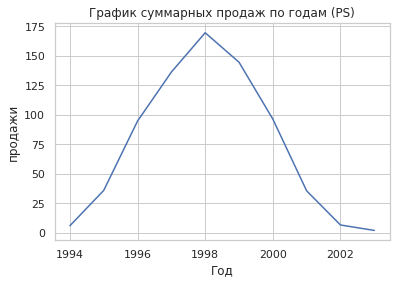

In [85]:
PS = df.query('platform == "PS"').groupby('year_of_release')['total_sales'].agg('sum')
PS.plot(title='График суммарных продаж по годам (PS)', grid=True, xlabel='Год',  ylabel='продажи')
plt.show()

Выход в 1994 году, хороший, постоянный рост до 1998 года и, после, постоянный спад.

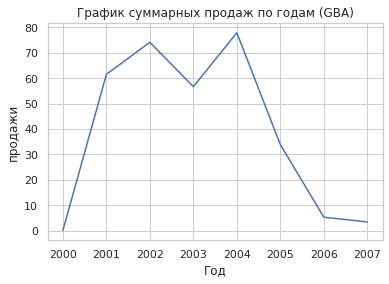

In [86]:
GBA	= df.query('platform == "GBA"').groupby('year_of_release')['total_sales'].agg('sum')
GBA.plot(title='График суммарных продаж по годам (GBA)', grid=True, xlabel='Год', ylabel='продажи')
plt.show()

Выход в 2000 и стремительный рост до 2001, с 2001 рост продолжается, но не такой сильный, в 2002 спад до 58млн копий и в 2003 последний рост продаж до 2004 года, потом постоянный спад. С выходом PSP начинается постоянный спад.

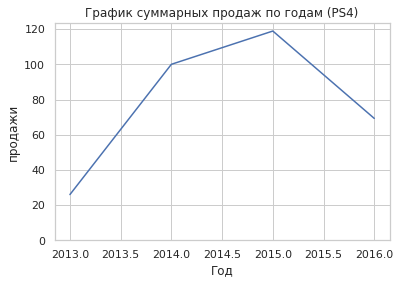

In [87]:
PS4	= df.query('platform == "PS4"').groupby('year_of_release')['total_sales'].agg('sum')
PS4.plot(title='График суммарных продаж по годам (PS4)', grid=True, xlabel='Год', ylim=0, ylabel='продажи')
plt.show()

Выход в 2013 и хороший рост продаж до 2015 года, потом идет спад.

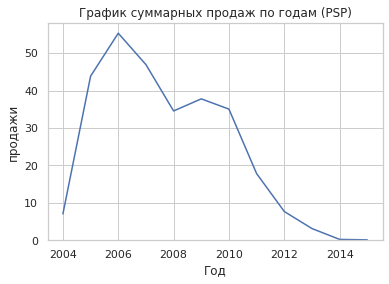

In [88]:
PSP	= df.query('platform == "PSP"').groupby('year_of_release')['total_sales'].agg('sum')
PSP	.plot(title='График суммарных продаж по годам (PSP)', grid=True, xlabel='Год', ylim=0, ylabel='продажи')
plt.show()

Выход в 2004 и начало стремительного роста  продаж  до 2006 года, потом идет скачкообразный спад, первый скачок до 2008 года, потом короткий рост до 2009 и потом кратковременный спад до 2010, после сильный постоянный спад продаж.

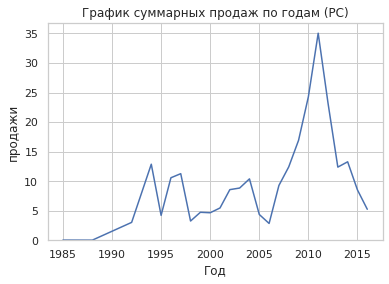

In [89]:
PC = df.query('platform == "PC"').groupby('year_of_release')['total_sales'].agg('sum')
PC.plot(title='График суммарных продаж по годам (PC)', grid=True, xlabel='Год', ylim=0, ylabel='продажи')
plt.show()

Выход в 1985 году не принес роста продаж вплоть до 1987 года, потом идет медленный рост в 1992 и в этом году резкий скачок продаж до 13млн, стоит заметить, что до 2006 года продажи PS постоянно растут и падают, 5 скачков, но ни один не принес больше продаж чем 1993, все меняется в 2006 году, резкий рост до 2011 года достигает 35млн копий, потом идет резкий спад, который продлиться до конца.

Смотрим год выпуска

In [90]:
y_r = df.groupby('platform').agg(year_of_release=('year_of_release', 'min')).reset_index().sort_values(by=['year_of_release'])
y_r

,platform,year_of_release
0,2600,1980.0
11,NES,1983.0
4,DS,1985.0
13,PC,1985.0
5,GB,1988.0
23,SNES,1990.0
8,GEN,1990.0
9,GG,1992.0
22,SCD,1993.0
12,NG,1993.0


Cтоит заметить что в начале формирования индустрия происходит большое количество выпускаемых платформ, но ближе к 2000 году вырабатывается характерный срок появлений платформ и их срок популярности - около 5 лет

In [91]:

temp = df.copy()
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона,
                                                            # поэтому +1
time_life['life'].median()

7.0

In [92]:
display(t.groupby('platform').agg(total_revenue=('total_sales', 'sum')).reset_index().sort_values(by=['total_revenue'], ascending=False).head(10))


,platform,total_revenue
4,PS4,314.14
3,PS3,181.43
10,XOne,159.32
0,3DS,143.25
9,X360,136.80
8,WiiU,64.63
2,PC,39.43
6,PSV,32.99
7,Wii,13.66
5,PSP,3.50


Стоит обратить внимание на платфоры PlayStation, Xbox и Wii.

#### Строим boxplot для разных платформ

Комментарий студента: реализовал так. Подскажи как у тебя реализовано? Например, цвет он у тебя есть, а я так и не смог сделать.

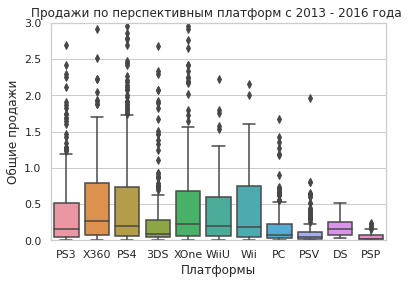

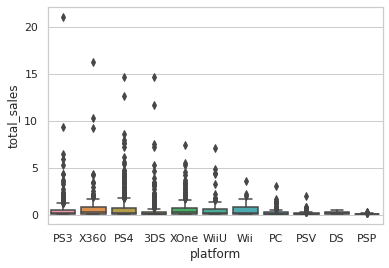

In [93]:
axes = plt.subplots(1,1)
sns.boxplot(x = 'platform', y = 'total_sales', data = t)
sns.set(style="whitegrid")
plt.ylim(0, 3)
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.title('Продажи по перспективным платформ с 2013 - 2016 года ')
plt.show()
sns.boxplot(x = 'platform', y = 'total_sales', data = t);


У PS3 медиана продаж равна 150т копий, а основные значения разбросаны между 40т и 510т проданных копий. Есть супер хит с 21млн продаж, а суммарное количество продаж равно 345млн. При этом у X360 медиана равна 265т а основные значения находятся разбросаны между 80т 795т копий. Есть супер хит 16 млн продаж, и суммарное количество продаж за выбранный период равно 186млн.  

Разберем PS4 и XOne. У PS4 медиана равна 200т, а основные значения разбросаны между 60т и 730т. Главный хит продался 14.63млн копий, а общее количество продаж равно 392млн. У XOne медиана равна 220т,  а основные значения разбросана между 60т и 685т главный хит принес 7.39 млн копий, а общее количество продаж равно 247млн.

Разберем еще WiiU. У нее медиана равна 200т, а основные значения разбросана между 60т и 595т, главный хит принес 7.09 млн продаж, а общее количество продаж равно 115млн.

#### Строим диаграмму рассеяния

Платформа: PS3  0.3342853393371919


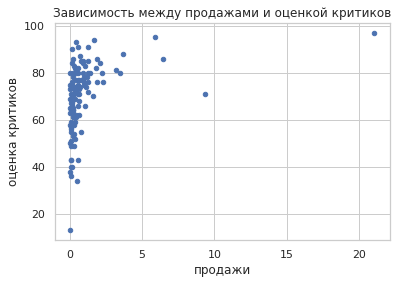

Платформа: X360  0.3503445460228664


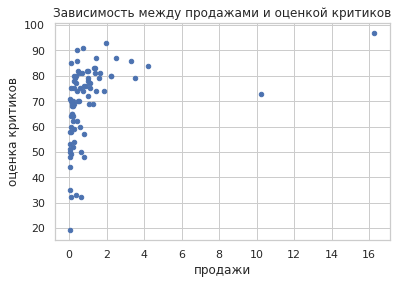

Платформа: PS4  0.40656790206178095


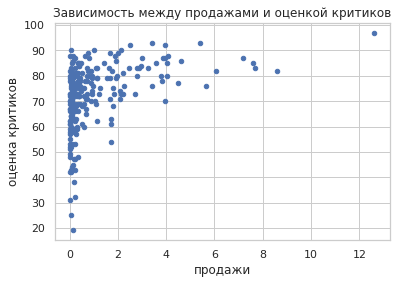

Платформа: 3DS  0.3570566142288103


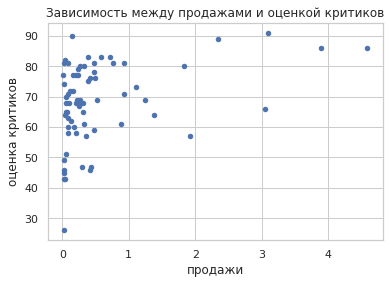

Платформа: XOne  0.4169983280084017


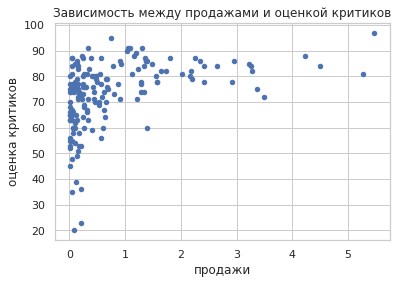

Платформа: PSV  0.2547423503068656


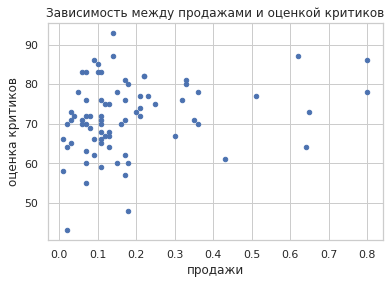

In [94]:
list_platfor = ['PS3', 'X360', 'PS4', '3DS', 'XOne','PSV']
for i in list_platfor:
  t.loc[t['platform'] == i].plot.scatter (x = 'total_sales', y = 'critic_score', title='Зависимость между продажами и оценкой критиков',  xlabel='продажи',  ylabel='оценка критиков',  color = 'b')
  cor_cor = t.loc[t['platform'] == i]['critic_score'].corr(t.loc[t['platform'] == i]['total_sales'])
  print(f"Платформа: {i}  {cor_cor}")
  plt.show()

Платформа: PS3  0.0023944027357566925
Платформа: X360  -0.011742185147181342
Платформа: PS4  -0.031957110204556376
Платформа: 3DS  0.24150411773563016
Платформа: XOne  -0.06892505328279414
Платформа: PSV  0.0009424723319108626


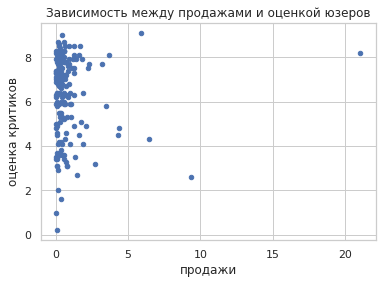

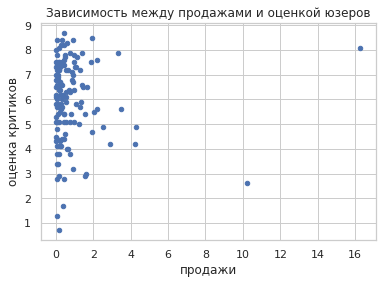

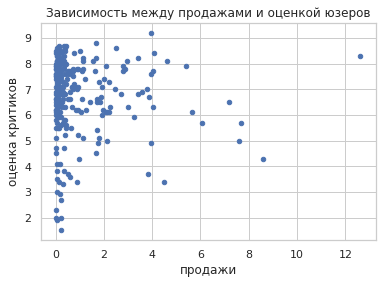

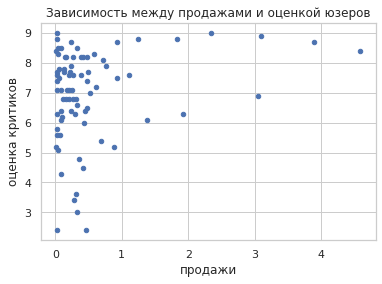

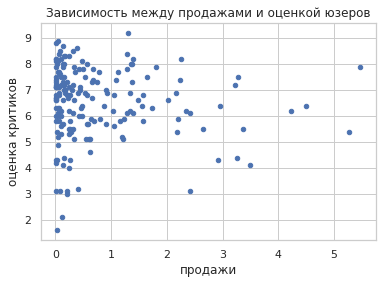

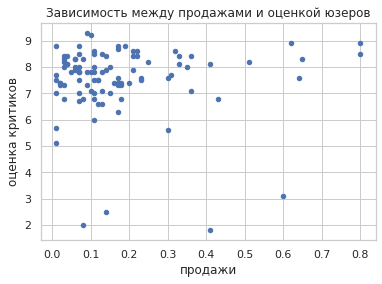

In [95]:
list_platfor = ['PS3', 'X360', 'PS4', '3DS', 'XOne','PSV']
for i in list_platfor:
  t.loc[t['platform'] == i].plot.scatter (x = 'total_sales', y = 'user_score', title='Зависимость между продажами и оценкой юзеров',  xlabel='продажи',  ylabel='оценка критиков',  color = 'b')
  cor_cor = t.loc[t['platform'] == i]['user_score'].corr(t.loc[t['platform'] == i]['total_sales'])
  print(f"Платформа: {i}  {cor_cor}")
  plt.show

Вывод: Зависимости между продажами и оценкой критиков или пользователей  нет.

Смотрим на общее распределение игр по жанрам

In [97]:
display(t.groupby('genre').agg(total_sales=('total_sales', 'median')).reset_index().sort_values('total_sales', ascending=False))


,genre,total_sales
8,Shooter,0.450
10,Sports,0.240
4,Platform,0.225
7,Role-Playing,0.125
2,Fighting,0.125
6,Racing,0.120
0,Action,0.110
9,Simulation,0.100
3,Misc,0.100
11,Strategy,0.080


Топ 5 жанров: Shooter, Sports, Platform, Role-Playing, Fighting.
Топ 5 жанров(непопулярных): Adventure, Puzzle, Strategy, Misc, Simulation.
Стоит заметить что осталось два жанра, которые не так сильно востребованы как топ 5 но и не такие непопулрные как топ 5 (непопулярных), а именно: Racing и Action.

##  Составляем портрет пользователя каждого региона

#### Топ 5 платформ по продажам

Комментарий студента: Подскажи, пожалуйста, как можно реализовать через pie с долей 'Другие'. Пробовал разное, но так и не вышло.

Смотрим на продажи в Северной Америке

In [98]:
n = t.groupby('platform')['na_sales'].agg('sum').sort_values(ascending=False).reset_index()
n['percent'] = n['na_sales'] /  n['na_sales'].sum() * 100
n

,platform,na_sales,percent
0,PS4,108.74,24.842933
1,XOne,93.12,21.274360
2,X360,81.66,18.656188
3,PS3,63.50,14.507322
4,3DS,38.20,8.727239
5,WiiU,29.21,6.673368
6,PC,11.11,2.538210
7,Wii,6.56,1.498709
8,PSV,5.04,1.151447
9,DS,0.57,0.130223


In [99]:
#n[5:].sum()

PS4 лидирует у него 24.8 процента рынка у XOne - 21.27, у  X360 -  18.6, у PS3 - 14.5, у 3DS - 8.7, а у  WiiU - 6.67.  Остальным 5 платформам суммарно принадлежит 11.99.

Смотрим на продажи в Европе

In [100]:
eu = t.groupby('platform')['eu_sales'].agg('sum').sort_values(ascending=False).reset_index()
eu['percent'] = eu['eu_sales'] /  eu['eu_sales'].sum() * 100
eu

,platform,eu_sales,percent
0,PS4,141.09,35.971241
1,PS3,67.81,17.288326
2,XOne,51.59,13.152997
3,X360,42.52,10.840578
4,3DS,30.96,7.893328
5,PC,25.36,6.465594
6,WiiU,19.85,5.060806
7,PSV,6.10,1.555210
8,Wii,5.93,1.511868
9,DS,0.85,0.216710


In [101]:
#eu[5:].sum()

В Европе 35.97 процентов продаж принадлежат PS4 и  PS3 - 17.28. XOne - 13.15, X360 - 10.840578. 3DS - 7.89. PC - 6.46. Остальным 5 платформам суммарно принадлежит  14.85.

Смотрим на продажи в Японии

In [102]:
jp = t.groupby('platform')['jp_sales'].agg('sum').sort_values(ascending=False).reset_index()
jp['percent'] = jp['jp_sales'] /  jp['jp_sales'].sum() * 100
jp

,platform,jp_sales,percent
0,3DS,67.81,48.167353
1,PS3,23.35,16.586163
2,PSV,18.59,13.205001
3,PS4,15.96,11.336838
4,WiiU,10.88,7.728371
5,PSP,3.29,2.336980
6,X360,0.51,0.362267
7,XOne,0.34,0.241512
8,Wii,0.05,0.035516
9,DS,0.00,0.000000


In [103]:
#jp[5:].sum()

Что называется любовь к отечественному производителю, все топ 5 Японские компании. 3DS - 48.16, второе место у PS3 -	16.58. PSV - 13.20, PS4 - 11.33, WiiU	-	7.72. Остальные 5 суммарно имеют  2.97.*Курсив*





#### Топ 5 жанров по странам

Топ 5 жанров в Северной Америке¶

In [104]:
display(t.groupby('genre')['na_sales'].agg('median').sort_values(ascending=False).head(5))


genre
Shooter     0.200
Platform    0.090
Sports      0.080
Fighting    0.045
Racing      0.030
Name: na_sales, dtype: float64

Топ 5 жанров в Европе

In [105]:
display(t.groupby('genre')['eu_sales'].agg('median').sort_values(ascending=False).head(5))

genre
Shooter       0.190
Platform      0.080
Racing        0.060
Sports        0.050
Simulation    0.035
Name: eu_sales, dtype: float64

Топ 5 жанров в Японии

In [106]:
t.groupby('genre')['jp_sales'].agg('median').sort_values(ascending=False).head(5)

genre
Role-Playing    0.05
Fighting        0.03
Misc            0.02
Puzzle          0.02
Action          0.01
Name: jp_sales, dtype: float64

В Европе и Северной Америке одинаково популярны жанры Action, Sports, Shooter. В Японии же самый популярный жанр Role-Playing, только потом идет Action, при этом  Misc замыкает тройку лидеров. Разница культур.

#### Влияние рейтинга на продажи

Северная Америка

In [107]:
t.groupby('rating')['na_sales'].agg('sum').sort_values(ascending=False)

rating
M             165.21
неизвестно     89.42
E              79.05
E10+           54.24
T              49.79
Name: na_sales, dtype: float64

Европа

In [108]:
t.groupby('rating')['eu_sales'].agg('sum').sort_values(ascending=False)

rating
M             145.32
E              83.36
неизвестно     78.91
E10+           42.69
T              41.95
Name: eu_sales, dtype: float64

Япония

In [109]:
t.groupby('rating')['jp_sales'].agg('sum').sort_values(ascending=False)

rating
неизвестно    85.05
T             20.59
E             15.14
M             14.11
E10+           5.89
Name: jp_sales, dtype: float64

В Европе и Северной Америке больше всего продается игр с рейтингом E, на втором месте по продажам идет рейтинг M  и на третьем T. Видно, что выставленный рейтинг влияет на количество проданных копий, например,  E(для всех), самый продаваемый, немудрено, так как рейтинг подразумевает возможность играть всем возрастам. В Японии же больше всего выходят игр с неопределённым рейтингом игр, но все равно второе место досталось рейтингу E

## Проверка гипотез

H0 = средний рейтинг у Xbox One равен среднему рейтингу PS
H1 = средний рейтинг у Xbox One  неравен среднему рейтингу PS

Используем t-test так как он работает для выборок любого размера. Так же для нас не важно  больше или меньше средней рейтин, поэтому тест двусторонний.

При условии что H0 верна какова вероятность получить H1

In [110]:
x_test = t[(t['platform'] == 'XOne') & (~t['user_score'].isna())]['user_score']
pc_test = t[(t['platform'] == 'PC') & (~t['user_score'].isna())]['user_score']

alpha = 0.05

results = st.ttest_ind(x_test, pc_test)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) таких платформ как  XOne и PC в пользу альтернативной гипотезы.

H0 = средний рейтинг у Action равен среднему рейтингу Sports
H1 = средний рейтинг у Action  неравен среднему рейтингу Sports
Используем t-test так как он работает для выборок любого размера. Так же для нас не важно  больше или меньше средней рейтин, поэтому тест двусторонний.

При условии что H0 верна какова вероятность получить H1


In [111]:
action_test =t[(t['genre'] == 'Action') & (t['user_score'] > 0)]['user_score']
sports_test = t[(t['genre'] == 'Sports') & (t['user_score'] > 0)]['user_score']
alpha = 0.05

results = st.ttest_ind(action_test, sports_test)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Вероятность получить такие значения низкая(порог alpha задан 0.05) при условии что H0 верна, поэтому мы отвергаем нулевую гипотезу, что означает средние рейтинги жанров Action и Sports разные

Вопрос студента: не понимаю что делать с nan в p-value?

#### Общий вывод

ПРЕДОБРАБОТКА ДАННЫХ:
Был проведен поиск дубликатов - в данных их не было обнаружено. Так же были изменены названия столбцов, а именно  - привели их к нижнему регистру. Изменили тип данных в столбце 'user_score' с object на float для удобной работы с данными. В столбце 'name' удалили две строки, так как они не несут для нас полезной информации, и их удаление не скажется на датасете. Вместе с ними удалились две строки из столбца 'genre' так как они были связаны. В столбце 'year_of_release' оставили значение NaN, так как год выхода мы не знаем. Так же мы можем заметить, что в 1980 году  индустрия игр была в самом начале формирования, поэтому количество оценок низкое(мало кто имел доступ к цифровым играм). Пропуски в столбцах critic_score и user_score оставляем, так как мы не можем оценить мнение критиков или людей оно уникально. В столбце 'rating' пропущенные значения нам неизвестны, поэтому мы их заменили на 'неизвестно'. Так же был добавлен столбец под названием 'total_sales' с общим количеством продаж.

ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ:
Была создана переменная с агрегированными данными от 2000 года. Заметно, что с этого года количество выпущенных игр существенное и количество оценок.Так же выяснили топ 10 платформ за все время.

    platform
	PS2	1255.77
	X360 971.42
	PS3	939.65
	Wii	907.51
    DS	806.12
	PS	730.86
	GBA	317.85
	PS4	314.14
	PSP	294.05
	PC	259.52
 Построили 10 графиков по топ 10 платформ. Графики описывают распределение продаж по годам в каждой платформе:

 PS2 - заметен сильный рост продаж в момент выхода приставки в 2000, который длится до 2004 года, потом идет постоянный спад.

 X360 - выход в 2005. Не такой стремитльеный рост как у PS2, но уверенный, длится до 2010 года, потом постоянный спад.

 PS3 - видим  рост продаж в 2006 году(дата выхода приставки), который длиться до 2011, потом идет спад до 2012, снова кратковременный рост и потом постоянный спад.

 Wii - рост продаж в  2006 году(дата выхода приставки), при этом первый год очень доходный около 126 млн копий продано, идет хороший рост до 2009 и потом постоянный сильный спад

 DS - год выпуска 1885, медленный рост продаж 2004, потом резкий рост до 142млн копий и резкий  постоянный спад.

 PS - выход в 1994 году, хороший, постоянный рост до 1998 года и, после, постоянный спад.

 GBA - выход в 2000 и стремительный рост до 2001, с 2001 рост продолжается, но не такой сильный, в 2002 спад до 58млн копий и в 2003 последний рост продаж до 2004 года, потом постоянный спад. С выходом PSP начинается постоянный спад.

 PS4 - выход в 2013 и хороший рост продаж до 2015 года, потом идет спад.

 PSP - выход в 2004 и начало стремительного роста  продаж  до 2006 года, потом идет скачкообразный спад, первый скачок до 2008 года, потом короткий рост до 2009 и потом кратковременный спад до 2010, после сильный постоянный спад продаж.

 PC - выход в 1985 году не принес роста продаж вплоть до 1987 года, потом идет медленный рост в 1992 и в этом году резкий скачок продаж до 13млн, стоит заметить, что до 2006 года продажи PS постоянно растут и падают, 5 скачков, но ни один не принес больше продаж чем 1993, все меняется в 2006 году, резкий рост до 2011 года достигает 35млн копий, потом идет резкий спад, который продлиться до конца.

 Также на основе графиков и сводной таблицы было замечено, что в начале формирования индустрия происходит большое количество выпускаемых платформ, но ближе к 2000 году вырабатывается характерный срок появления платформ - около 5 лет.

 Также было построенно 10 диаграмм рассеяния: одни показывает зависимость между продажами и оценкой критиков(взаимосвязи почти нет), а другие показывает зависимость между продажами и оценкой юзеров(взаимосвязи нет)

Были построенны графики по топ 5 платформ по продажам в отдельном регионе:

Продажи в Северной Америке

PS4 лидирует у него 24.8 процента рынка у XOne - 21.27, у X360 - 18.6, у PS3 - 14.5, у 3DS - 8.7, а у WiiU - 6.67. Остальным 5 платформам суммарно принадлежит 11.99.

Продажи в Европе

В Европе 35.97 процентов продаж принадлежат PS4 и  PS3 - 17.28. XOne - 13.15, X360 - 10.840578. 3DS - 7.89. PC - 6.46. Остальным 5 платформам суммарно принадлежит  14.85.

Продажи в Японии

Что называется любовь к отечественному производителю, все топ 5 Японские компании. 3DS - 48.16, второе место у PS3 -	16.58. PSV - 13.20, PS4 - 11.33, WiiU	-	7.72. Остальные 5 суммарно имеют  2.97.*Курсив*


Также выяснили топ 5 жанров по странам:

В Северной Америке


Shooter     0.200;
Platform    0.090;
Sports      0.080;
Fighting    0.045;
Racing      0.030;

В Европе


Shooter       0.190;
Platform      0.080;
Racing        0.060;
Sports        0.050;
Simulation    0.035;

В Японии

Role-Playing    0.05;
Fighting        0.03;
Misc            0.02;
Puzzle          0.02;
Action          0.01;

Показаны медианный значения.

В Европе и Северной Америке одинаково популярны жанры Shooter, Platform, Sports. В Японии же самый популярный жанр Role-Playing, только потом Fighting, при этом  Misc замыкает тройку лидеров Японии. Разница культур.


Также заметно, как рейтинг влияет на продажи: в Европе и Северной Америке больше всего продается игр с рейтингом E, на втором месте по продажам идет рейтинг M  и на третьем T. Видно, что выставленный рейтинг влияет на количество проданных копий, например,  E(для всех), самый продаваемый, немудрено, так как рейтинг подразумевает возможность играть всем возрастам. В Японии же больше всего выходят игр с региональным рейтингом, но все равно второе место досталось рейтингу E.

Также были выдвинуты две гипотезы:

1. Равны ли средние пользовательские рейтинги (отзывы) платформ Xbox One и PC? Гипотеза была отвергнута на уровне значимости 5% в пользу альтернативной — их средние рейтинги не равны.

2. Равны ли средние пользовательские рейтинги (отзывы) жанров Action и Sports? Гипотеза была отвергнута на уровне значимости 5% в пользу альтернативной — их средние рейтинги не равны.

РЕКОМЕНДАЦИЯ БИЗНЕСУ:
Магазину "Стримчик" стоит закупать игры в жанрах  Action, Sports, Shooter, Role-Playing, Misc с рейтингом 'E', но рейтиг 'M' и "T" тоже весьма прибольны. При закупках игр стоит рассматривать платформы PlayStation, Xbox
 и DS(этот вариант для Япоского рынка). 
 
 Стоит заметить, что на отзывы критиков и пользователей обращать внимание не стоит, так как существенной корреляции между проданными копиями и оценкой не было обнаружено.

Определяющие успешность игры закономерности:
В Европе и Северной Америке в рекламной компании делать ставку на игры жанра Shooter с рейтингом 'E', для Северной Америки желательна платформа Xbox, а для Европы PlayStation.  Также можно рассмотреть вариант с жанром Sports  с рейтингом 'E'. В Японии же лучше сделать ставку на жанр Role-Playing  с рейтингом 'E'. А платформу выбрать DS.
